In [1]:
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

## Loading data

In [2]:
df_maldita = pd.read_json('./../data/count_day_maldita.json')
df_google = pd.read_json('./../data/count_day_google.json')
df_tweets = pd.read_json('./../data/count_day_tweets.json')
df_mynews = pd.read_json('./../data/count_day_mynews.json')

In [3]:
df_maldita['date'] = df_maldita['date'].astype('datetime64[ns]') 
df_google['date'] = df_google['date'].astype('datetime64[ns]') 
df_tweets['date'] = df_tweets['date'].astype('datetime64[ns]') 
df_mynews['date'] = df_mynews['date'].astype('datetime64[ns]') 

## Time period

In [10]:
# Getting only from the day we changed the algo
from_date = datetime.datetime.strptime("2023-05-03", '%Y-%d-%m')
to_date = datetime.datetime.strptime("2023-05-04", '%Y-%d-%m')


In [15]:
df_mynews = df_mynews[(df_mynews['date'] >= from_date) & (df_mynews['date'] <= to_date)]
df_google = df_google[(df_google['date'] >= from_date) & (df_google['date'] <= to_date)]
df_tweets = df_tweets[(df_tweets['date'] >= from_date) & (df_tweets['date'] <= to_date)]
df_maldita = df_maldita[(df_maldita['date'] >= from_date) & (df_maldita['date'] <= to_date)]

In [16]:
print(f" First day for Maldita: {min(df_maldita['date'])}")
print(f" Last day for Maldita: {max(df_maldita['date'])}")
print(f" Lenght period for Maldita: {max(df_maldita['date']) - min(df_maldita['date']) }")

 First day for Maldita: 2023-03-05 00:00:00
 Last day for Maldita: 2023-04-05 00:00:00
 Lenght period for Maldita: 31 days 00:00:00


In [17]:
print(f" First day for Google: {min(df_google['date'])}")
print(f" Last day for Google: {max(df_google['date'])}")
print(f" Lenght period for Google: {max(df_google['date']) - min(df_google['date']) }")

 First day for Google: 2023-03-05 00:00:00
 Last day for Google: 2023-04-05 00:00:00
 Lenght period for Google: 31 days 00:00:00


In [18]:
print(f" First day for Twitter: {min(df_tweets['date'])}")
print(f" Last day for Twitter: {max(df_tweets['date'])}")
print(f" Lenght period for Twitter: {max(df_tweets['date']) - min(df_tweets['date']) }")

 First day for Twitter: 2023-03-05 00:00:00
 Last day for Twitter: 2023-04-05 00:00:00
 Lenght period for Twitter: 31 days 00:00:00


In [19]:
print(f" First day for MyNews: {min(df_mynews['date'])}")
print(f" Last day for MyNews: {max(df_mynews['date'])}")
print(f" Lenght period for MyNews: {max(df_mynews['date']) - min(df_mynews['date']) }")

 First day for MyNews: 2023-03-05 00:00:00
 Last day for MyNews: 2023-04-05 00:00:00
 Lenght period for MyNews: 31 days 00:00:00


## Per claims

In [41]:
df_tweets

,date,fact_id,count
17,2023-03-07,6425573e74818bc11114dc9a,141
18,2023-03-09,64028a1594a78671232dee3f,26
20,2023-03-15,640bc48c12b81f6047a2e4e4,5
28,2023-03-08,6425573e74818bc11114dc98,2
32,2023-03-24,641b968b95eb654a4f9a1db2,73
...,...,...,...
6922,2023-03-21,64125c1627d13303b469f14f,11
6925,2023-03-19,6414ff0caf768e5fbd736764,42
6926,2023-04-05,642b688cc3feb4e7428e59b7,310
6931,2023-03-05,6425573d74818bc11114dc76,1


In [38]:
df_tweets.groupby('fact_id').sum('count').mean()

count    854.776224
dtype: float64

<AxesSubplot: xlabel='count'>

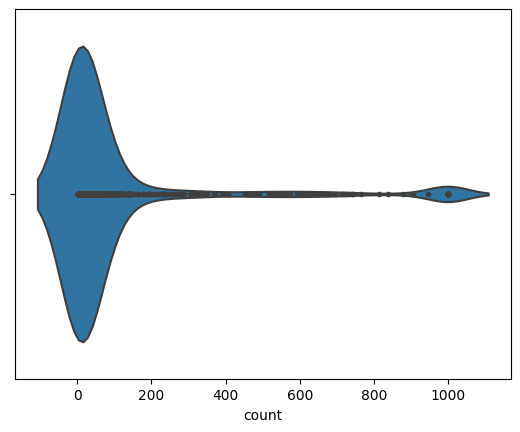

In [40]:
sns.violinplot(x=df_tweets['count'],  inner = "point")

In [24]:
df_mynews.groupby('fact_id').sum('count').mean()

count    98.414815
dtype: float64

<AxesSubplot: xlabel='count'>

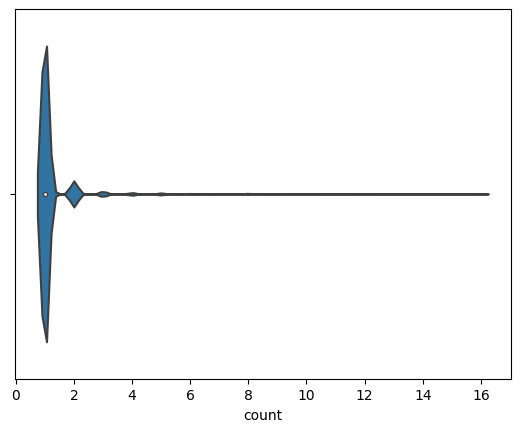

In [25]:
sns.violinplot(x=df_mynews['count'])

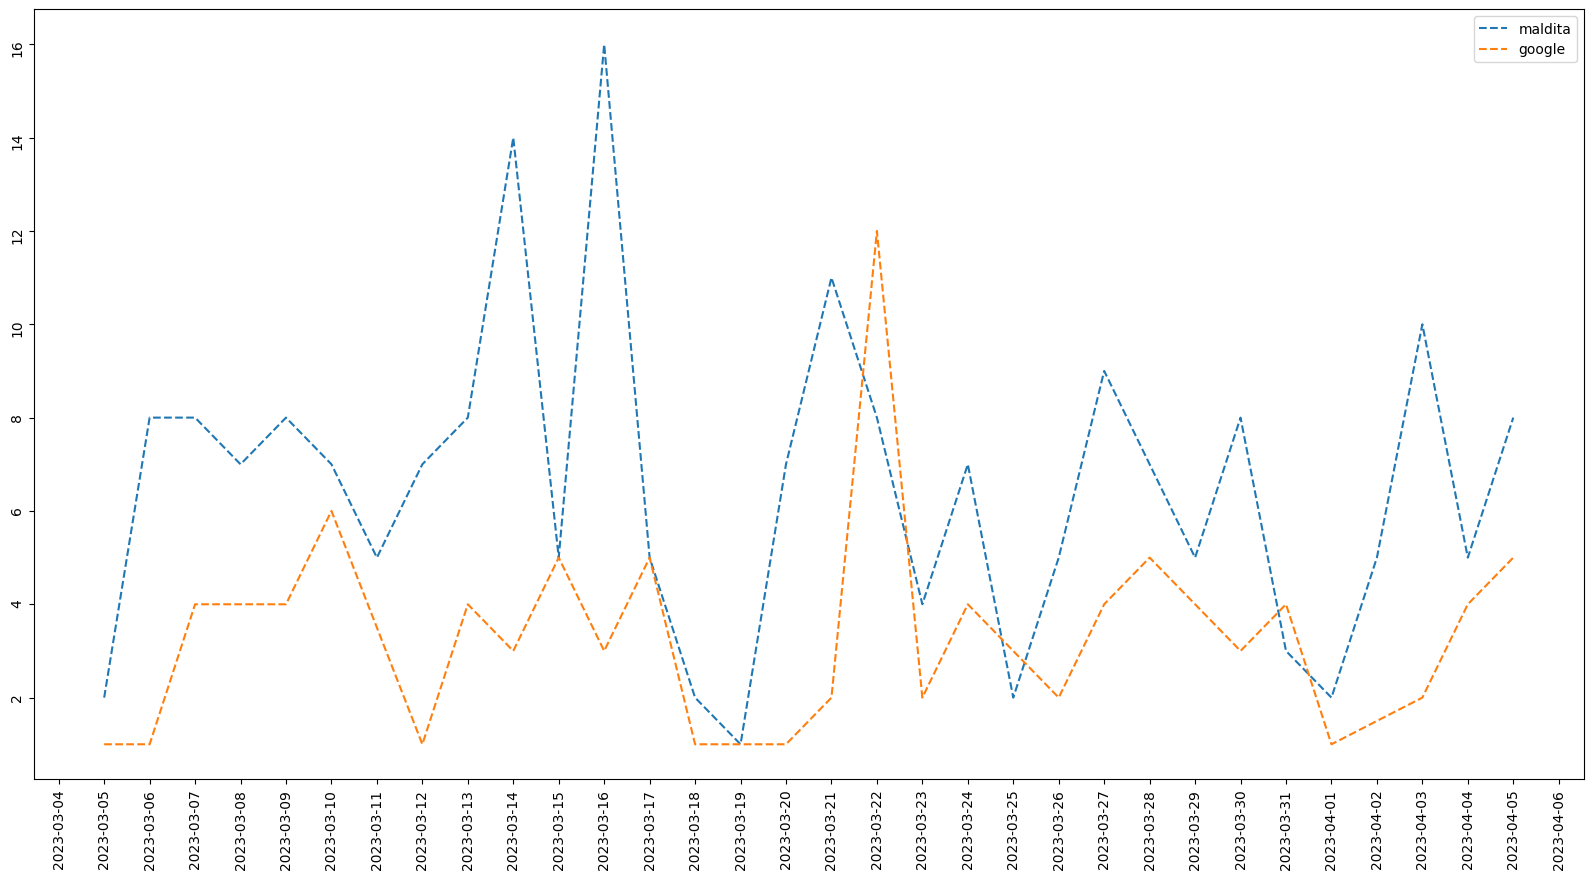

In [26]:
maldita = df_maldita.groupby(df_maldita['date'])['count'].sum()
google = df_google.groupby(df_google['date'])['count'].sum()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot_date(maldita.index, maldita.values, '--', label='maldita')
ax.plot_date(google.index, google.values, '--', label='google')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
ax.legend()
plt.show()

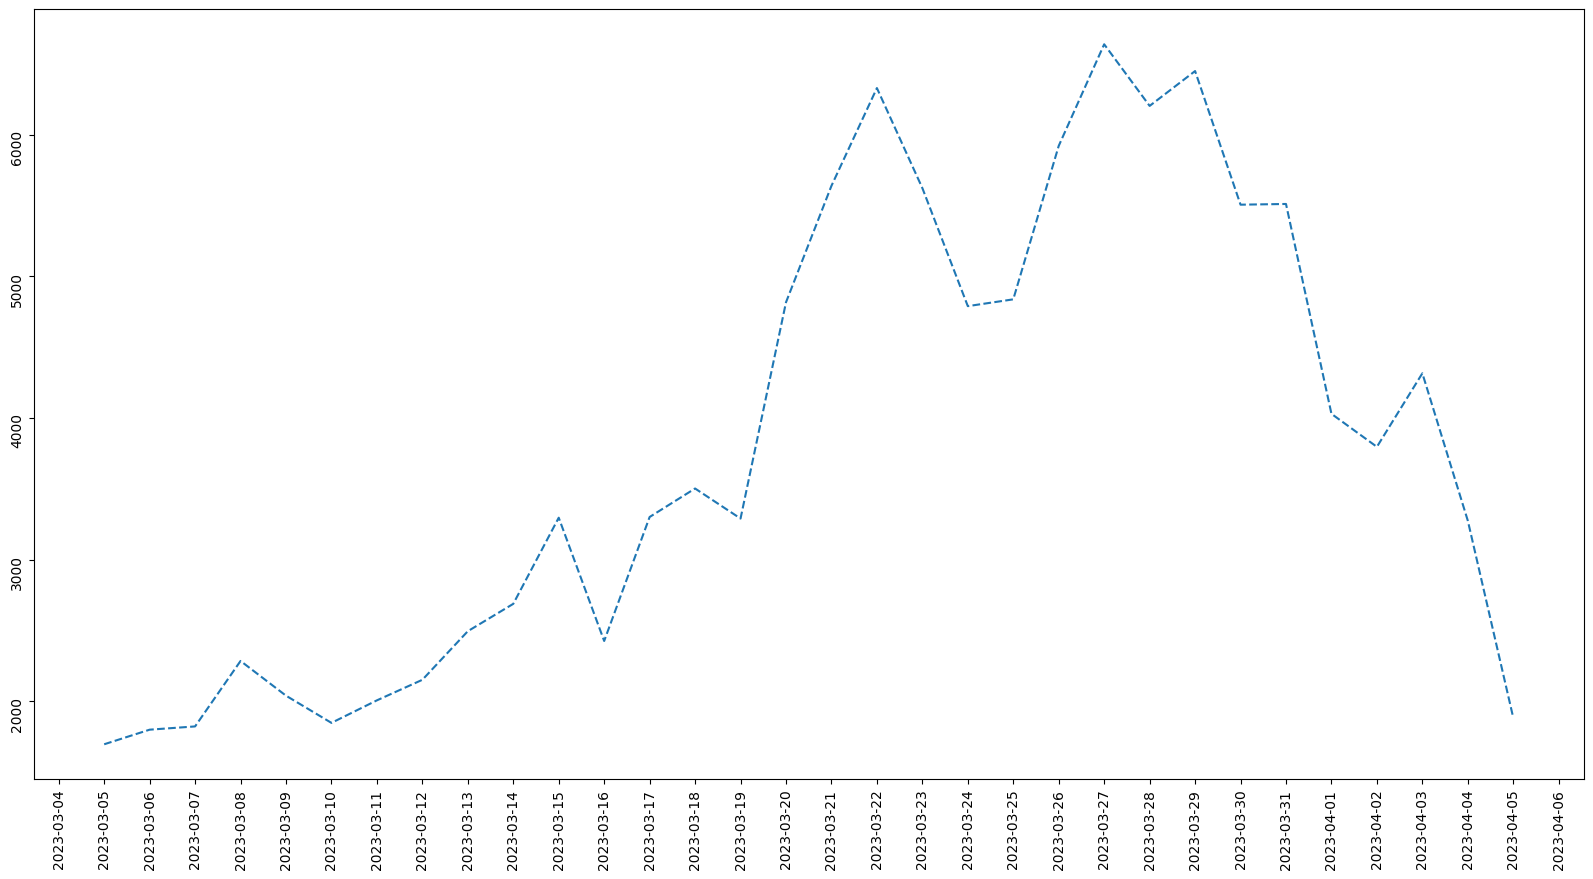

In [27]:
tweets = df_tweets.groupby(df_tweets['date'])['count'].sum()
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot_date(tweets.index, tweets.values, '--')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
plt.show()

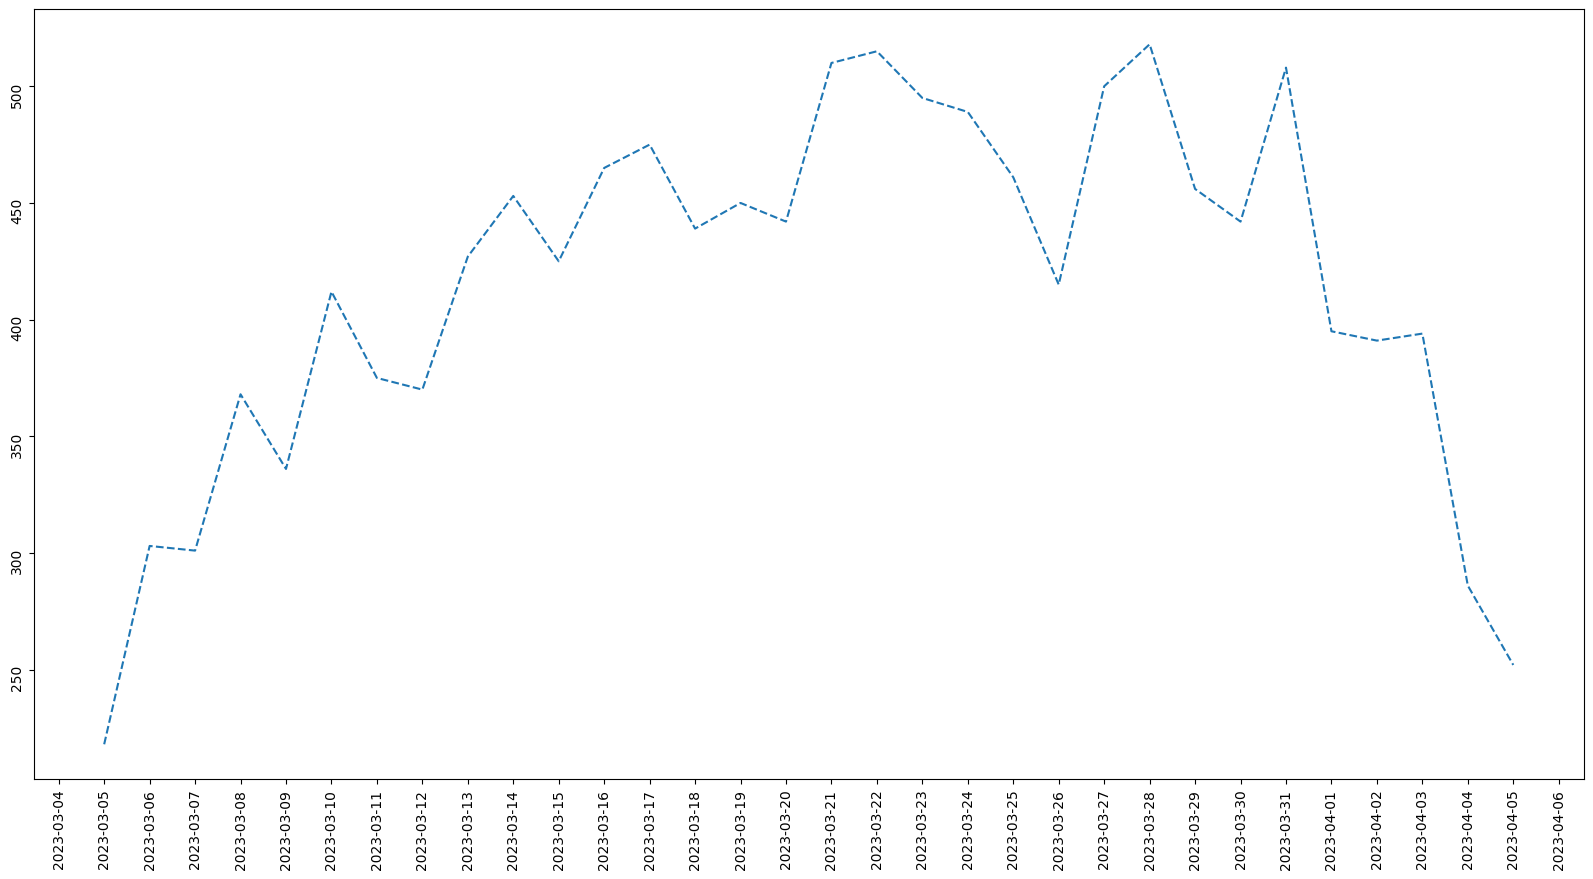

In [28]:
mynews = df_mynews.groupby(df_mynews['date'])['count'].sum()
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot_date(mynews.index, mynews.values, '--')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
plt.show()

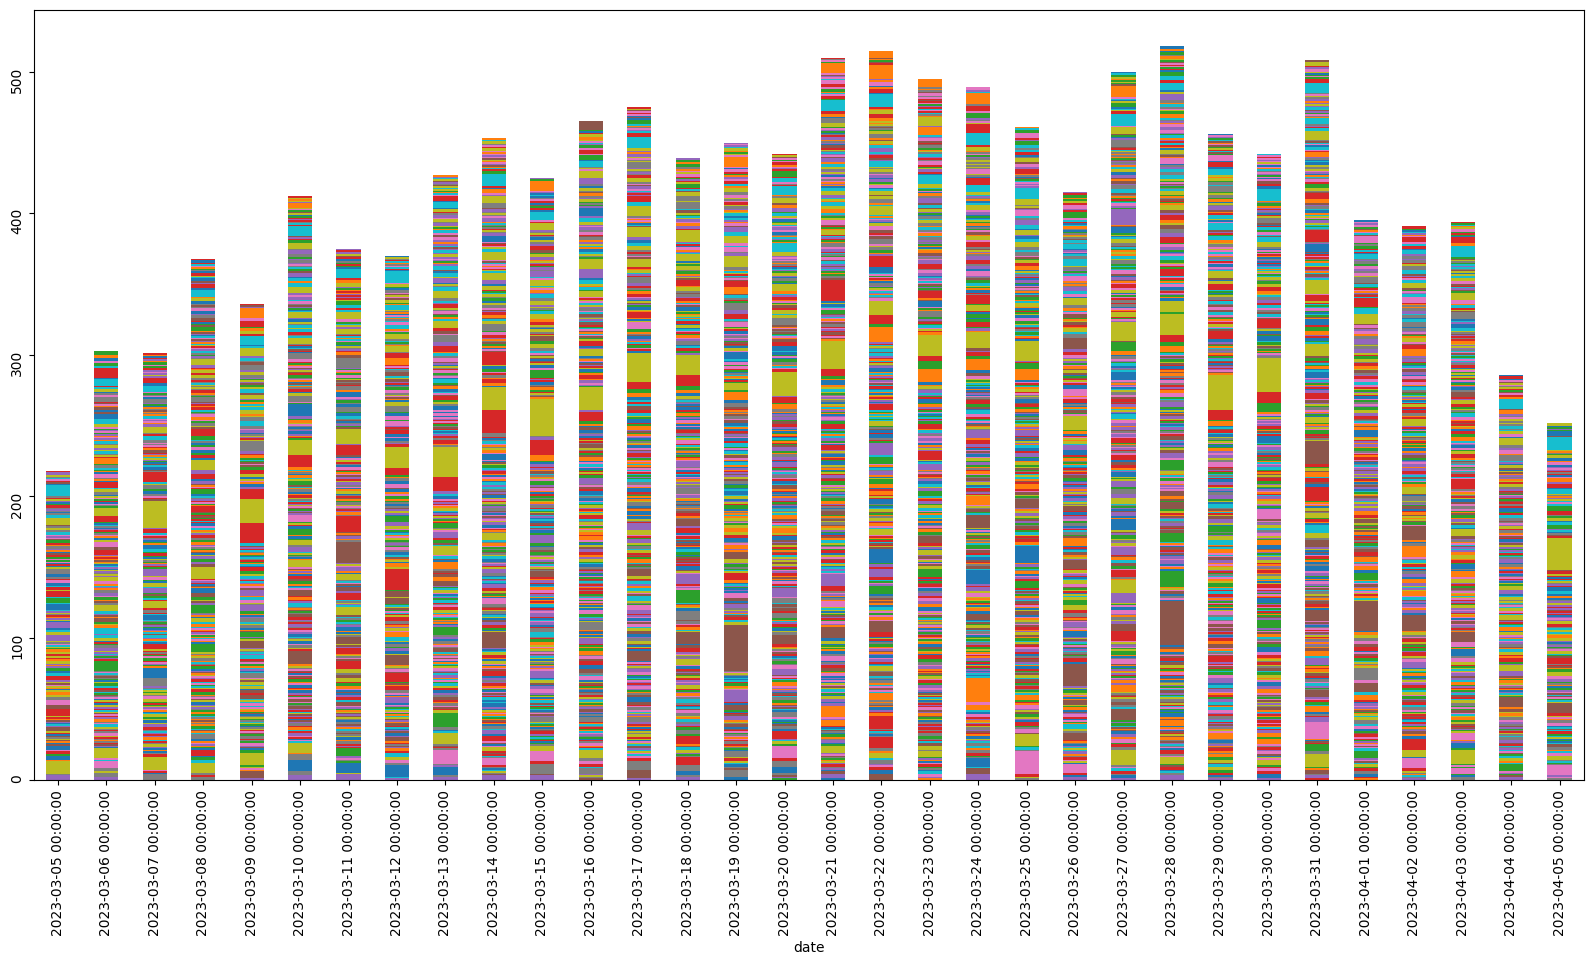

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
df_mynews.groupby([df_mynews['date'], df_mynews['newspaper']])['count'].sum().unstack().plot.bar(stacked=True, 
                                                                                                 ax=ax, legend=False)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
plt.show()

## Newspaper parsed

In [37]:
unique_newspapers = df_mynews['newspaper'].unique().size
unique_newspapers

2565

<AxesSubplot: >

/home/olivier/.cache/pypoetry/virtualenvs/iberifier-KmB0-QDJ-py3.10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/home/olivier/.cache/pypoetry/virtualenvs/iberifier-KmB0-QDJ-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


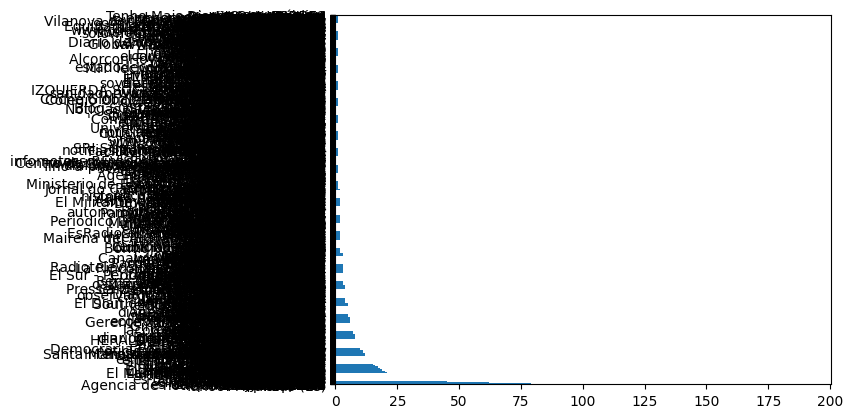

In [33]:
df_mynews['newspaper'].value_counts().plot(kind='barh')